In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons

# X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

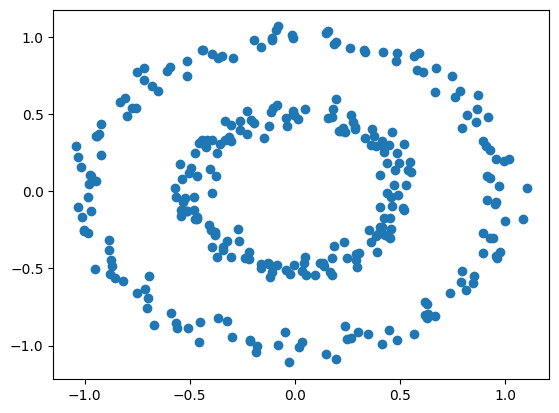

In [40]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [41]:
import numpy as np;
from numpy.linalg import norm

class KMeans:
    def __init__(self, n_clusters, max_iter =100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_ = None
        self.labels = None
        self.inertia_ = None
        
    def fit(self, X):
        # 초기 중심점 설정
        self.cluster_centers_ = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            #거리 계산, 클러스터 할당
            distances = norm((X[:, np.newaxis] - self.cluster_centers_), axis = 2)
            self.labels = np.argmin(distances, axis=1)
            
            
            #중심점 새로 계산
            cluster_centers = []
            # for i in range(self.n_clusters):
                # new_center = X[self.labels == i].mean(axis = 0)
                # cluster_centers.append(new_center)
                
                # cluster_centers = np.array(cluster_centers)
                
            cluster_centers = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
            #중심점 변화 여부에 따라서 종료
            
            if np.all(cluster_centers == self.cluster_centers_):
                break
            
            self.cluster_centers_ = cluster_centers
        
        self.inertia_ = (distances[np.arange(distances.shape[0]), self.labels] ** 2).sum()
    def predixt(self, X):
        distances = norm((X[:, np.newaxis] - self.cluster_centers_), axis = 2)
        return np.argmin(distances, axis=1) 


In [42]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)

model.labels_

array([0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2,
       1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2,
       2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 1, 2, 1,
       1, 2, 0, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 1,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1], d

<function matplotlib.pyplot.show(close=None, block=None)>

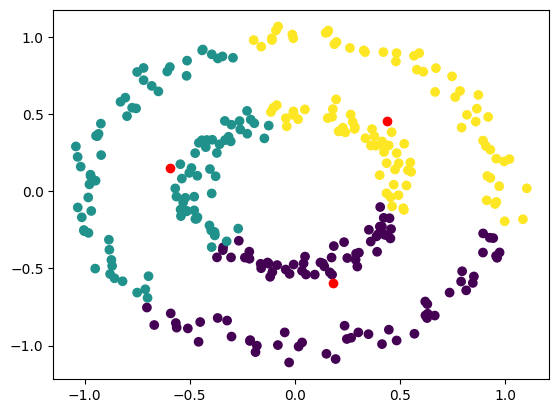

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], c='red')
plt.show

In [44]:
import numpy as np
from numpy.linalg import norm
indices = X[np.random.choice(len(X), 3, replace=False)]
# print(indices)
# print(X[indices])
# X[:, np.newaxis].shape
distances = norm((X[:, np.newaxis] - indices), axis = 2)
labels = np.argmin(distances, axis=1)
# print(distances[:3])
# print(np.argmin(dist
# 
# labels == 1ances, axis=1))

# (X[labels == 1]).mean(axis=0)

print(distances)
print(labels)

(distances[np.arange(distances.shape[0]), labels] ** 2).sum()

[[1.37531783 1.32396528 1.40697694]
 [0.06809152 1.43271863 0.1595336 ]
 [1.21667088 1.55845824 1.29302724]
 [0.96195057 0.53631777 0.87397998]
 [1.44787064 1.11198384 1.44636304]
 [0.50335887 1.22264047 0.55584859]
 [0.42746388 1.23082398 0.48090828]
 [1.37351412 1.2089053  1.3895947 ]
 [0.6836111  0.7722852  0.60315945]
 [0.61998057 0.82876115 0.54162016]
 [0.67589901 0.76094917 0.58567809]
 [1.45419852 0.8495785  1.41868399]
 [1.20171579 1.54206124 1.27690952]
 [1.83404386 0.68522475 1.75300743]
 [1.41841395 1.39320419 1.4563775 ]
 [2.07531166 1.55398769 2.07882719]
 [0.60157529 1.28455001 0.66980186]
 [1.3106703  0.70297586 1.26201128]
 [0.42464706 1.19174033 0.46282038]
 [1.1034093  0.52209838 1.02748768]
 [1.436151   0.75734736 1.39003701]
 [1.93817054 1.26545952 1.9188267 ]
 [1.41511229 1.89465887 1.51963307]
 [0.48791499 1.04753429 0.31653265]
 [0.69232613 0.757864   0.60827886]
 [0.89471816 0.62939299 0.81872992]
 [0.55331521 0.95880947 0.51562899]
 [0.67939547 1.84330917 0.84

np.float64(275.8071663509758)